In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("./dataset/SOCR-HeightWeight.csv")
data = data.drop("Index", axis=1)
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


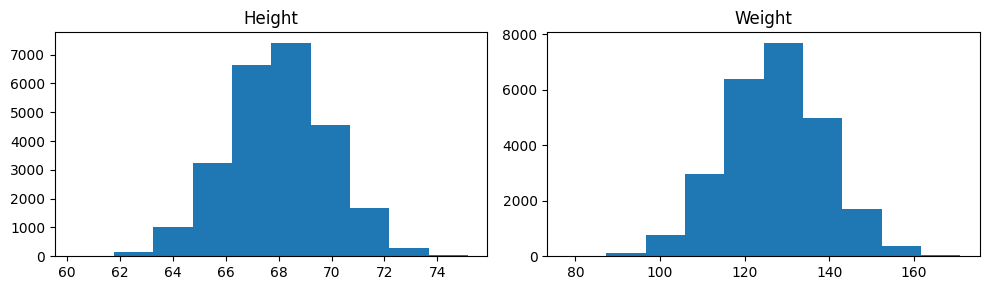

In [4]:
plt.figure(figsize=(10,3))
for i, col in enumerate(data.columns):
    plt.subplot(1,2,i+1)
    plt.hist(data[col])
    plt.title(col.split("(")[0])

plt.tight_layout()
plt.show()

In [5]:
X = data["Height(Inches)"]
y = data["Weight(Pounds)"]

print(f"Shape of features: {X.shape}")
print(f"Shape of labels: {y.shape}")

Shape of features: (25000,)
Shape of labels: (25000,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [8]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (20000, 1)
Shape of X_test: (5000, 1)
Shape of y_train: (20000,)
Shape of y_test: (5000,)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 100.56177430285919


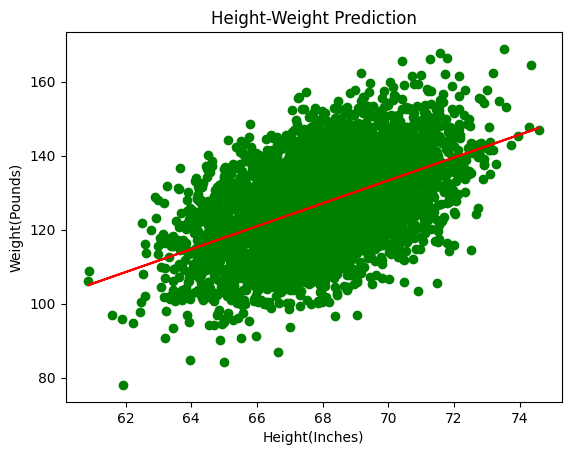

In [11]:
plt.scatter(X_test, y_test, c="g")
plt.plot(X_test, y_pred, c="r")
plt.xlabel(data.columns[0]), plt.ylabel(data.columns[1])
plt.title("Height-Weight Prediction")
plt.show()

In [12]:
def predict_weight(model,height):
    height = np.array(height).reshape(-1,1)
    pred_ht = model.predict(height)
    return round(pred_ht[0], 4)

In [13]:
height = 65.78331
print(f"Predicted Weight at height {height} inches is {predict_weight(lr, height)} pounds")

Predicted Weight at height 65.78331 inches is 120.2457 pounds
